# Model Evaluation

This notebook is to evaluate the model trained for VQA.

In [1]:
%matplotlib inline
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Get Dataloader

In [2]:
from data_loader import get_loader

# dataloader params
#input_dir = '../../data/vqa/inputs64'
input_dir = '../../data/vqa/inputs224'
max_qst_length = 30
max_num_ans = 10
batch_size = 4
num_workers = 0
train_portion = 0.01

data_loader = get_loader(
    input_dir=input_dir,
    input_vqa_train='train.npy',
    input_vqa_valid='valid.npy',
    max_qst_length=max_qst_length,
    max_num_ans=max_num_ans,
    batch_size=batch_size,
    num_workers=num_workers,
    train_portion=train_portion)

train_loader = data_loader['train']
train_dataset = train_loader.dataset.dataset
print(f'data_loader train len: {len(train_loader)}')
print(f'qst_vocab_size: {train_dataset.qst_vocab.vocab_size}')


data_loader train len: 1110
qst_vocab_size: 17858


### Get Model

In [18]:
import config
from models_lct import VqaModel as LctVqaModel

config.ARCH_TYPE = 'fixed-darts'
config.PRETRAIN_ENC = False
config.SKIP_STAGE2 = True

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# model params
embed_size = 512
qst_vocab_size = train_dataset.qst_vocab.vocab_size
ans_vocab_size = 1000
word_embed_size = 300
num_layers = 1
hidden_size = 512

def get_model(exp_path):
    model = LctVqaModel(
        embed_size=embed_size,
        qst_vocab_size=qst_vocab_size,
        ans_vocab_size=ans_vocab_size,
        word_embed_size=word_embed_size,
        num_layers=num_layers,
        hidden_size=hidden_size
    )
    model.to( DEVICE )
    model_name = 'ef_model.pt'
    model_path = os.path.join(exp_path, model_name)
    state_dict = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict( state_dict['ef_model'] )
    
    # freeze params
    for param in model.parameters():
        param.requires_grad = False
    model.eval()
    return model

exp_dir = './experiment_data'
exp_name = 'exp-darts-nopretrain'
# exp_name = 'exp2080Ti-1'
exp_path = os.path.join(exp_dir, exp_name)
model = get_model(exp_path)
print('model type:', type(model))

48 48 48
48 192 48
192 192 48
192 192 48
192 192 96
192 384 96
384 384 96
384 384 96
384 384 96
384 384 192
384 768 192
768 768 192
768 768 192
768 768 192
model type: <class 'models_lct.VqaModel'>


### Evaluate Model - Plots

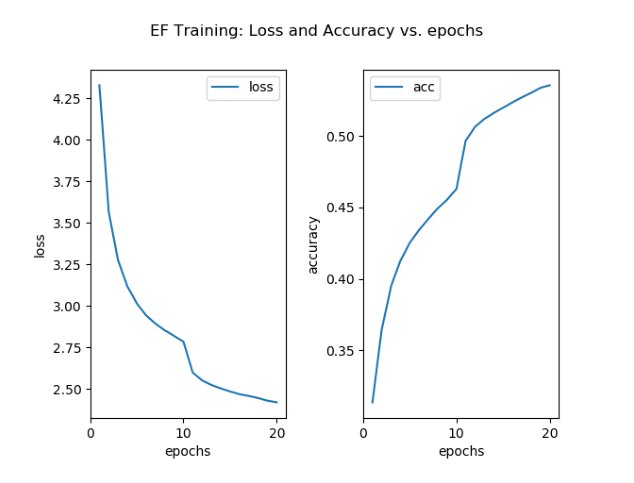

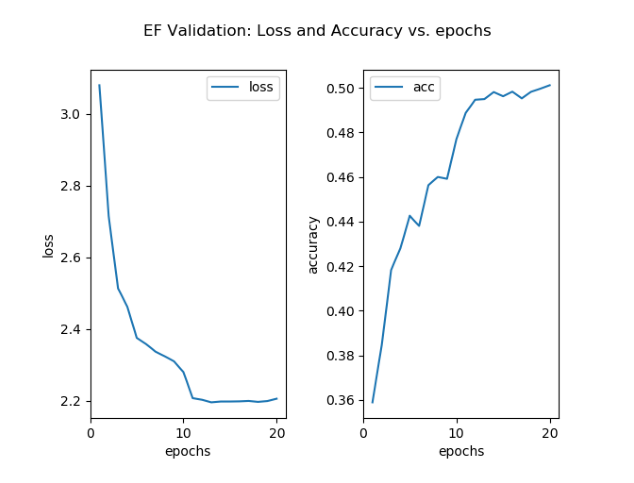

In [19]:
plt.rcParams['figure.dpi'] = 150
ef_train_plot_path = os.path.join( exp_path, 'ef_train_loss_acc.png' )
ef_val_plot_path = os.path.join( exp_path, 'ef_val_loss_acc.png' )

plt.axis('off')
train_img = mpimg.imread(ef_train_plot_path)
plt.imshow(train_img)
plt.show()

plt.axis('off')
val_img = mpimg.imread(ef_val_plot_path)
plt.imshow(val_img)
plt.show()

if not config.SKIP_STAGE2:
    w_train_plot_path = os.path.join( exp_path, 'w_train_loss_acc.png' )
    plt.axis('off')
    train_img = mpimg.imread(w_train_plot_path)
    plt.imshow(train_img)
    plt.show()

### Evaluate Model - Questions ( Deterministic Sampling )

qst_encoder deterministic: True temperature: 0.1
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000397186.jpg


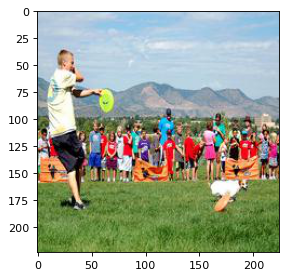

ground truth qst: what is the dog doing ? ans: running
generated qst: what is the man doing ? ans: flying kite


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


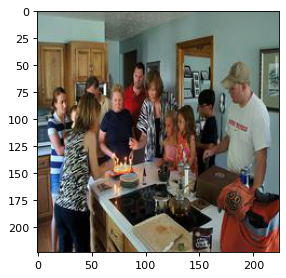

ground truth qst: where is the beer ? ans: fridge
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000536855.jpg


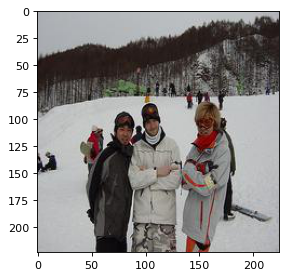

ground truth qst: what is the color of the ladies winter coat ? ans: gray
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001200.jpg


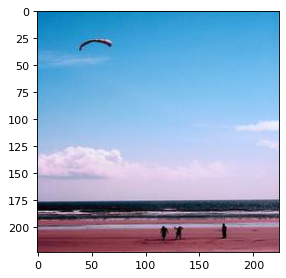

ground truth qst: how many people are there ? ans: 3
generated qst: what is the man doing ? ans: flying kite


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262561.jpg


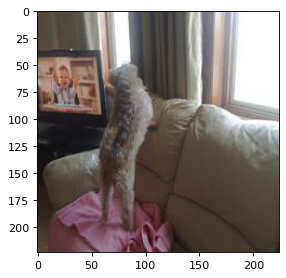

ground truth qst: what color is the blanket under the dog ? ans: pink
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000502604.jpg


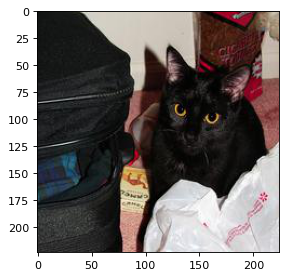

ground truth qst: what type of leaf is in the bag behind the cat ? ans: <unk>
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262463.jpg


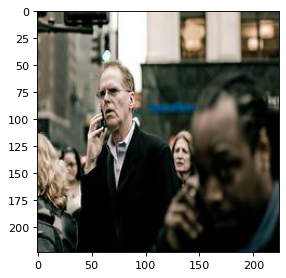

ground truth qst: is the man wearing a tie ? ans: no
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262786.jpg


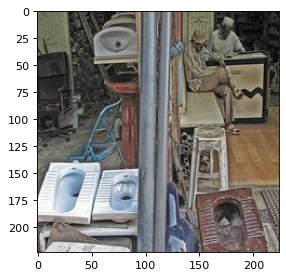

ground truth qst: is this a workplace ? ans: yes
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000071.jpg


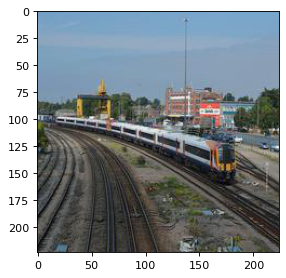

ground truth qst: is this train headed towards or from the orange building ? ans: away
generated qst: what is the man doing ? ans: flying kite


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000174964.jpg


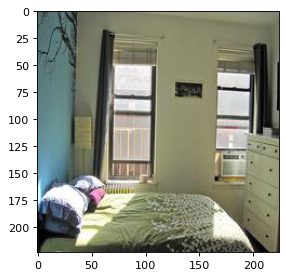

ground truth qst: is the bed made ? ans: yes
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000427745.jpg


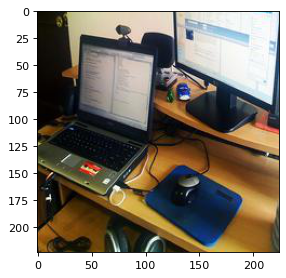

ground truth qst: what color is the mouse on the left ? ans: blue
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131747.jpg


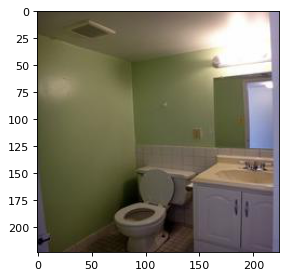

ground truth qst: is the bathroom monotone ? ans: no
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393714.jpg


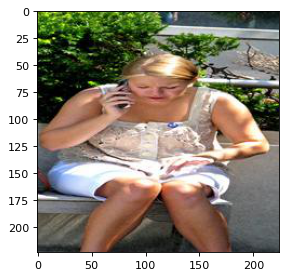

ground truth qst: what color are the woman ' s shorts ? ans: white
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000382.jpg


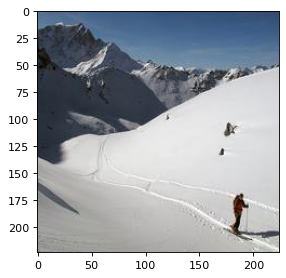

ground truth qst: is there a person ? ans: yes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000284098.jpg


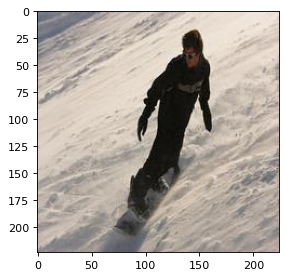

ground truth qst: what are on the people ' s feet ? ans: boots
generated qst: what is the man holding ? ans: surfboard


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000480723.jpg


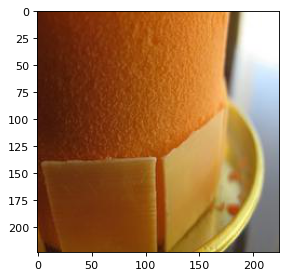

ground truth qst: what color is the platter ? ans: yellow
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524520.jpg


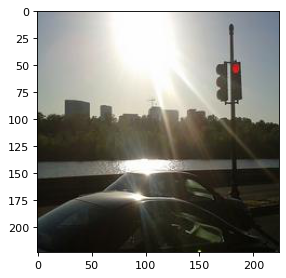

ground truth qst: what traffic light is on ? ans: red
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000025.jpg


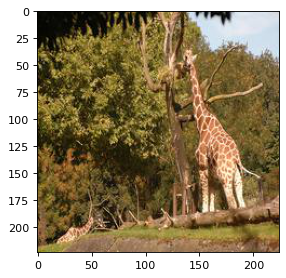

ground truth qst: are some of the trees dead ? ans: yes
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524661.jpg


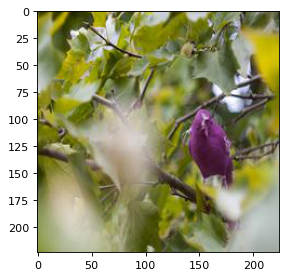

ground truth qst: is this a real bird ? ans: yes
generated qst: what is the man holding ? ans: bat


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393403.jpg


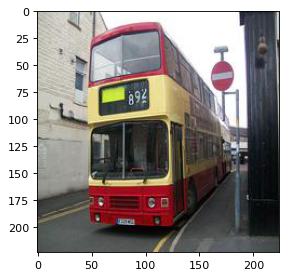

ground truth qst: is this a one way street ? ans: yes
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393251.jpg


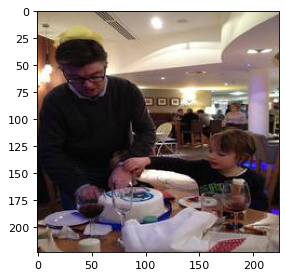

ground truth qst: is the man wearing glasses ? ans: yes
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262690.jpg


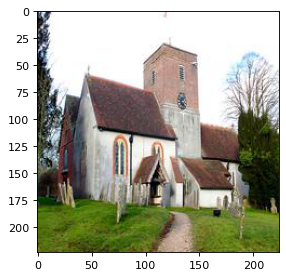

ground truth qst: what time is showing on the clock ? ans: not sure
generated qst: what is the man doing ? ans: playing frisbee


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131101.jpg


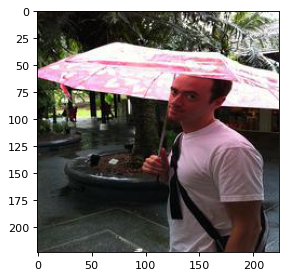

ground truth qst: which hand holds the umbrella ? ans: right
generated qst: what is the man holding ? ans: phone


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000458763.jpg


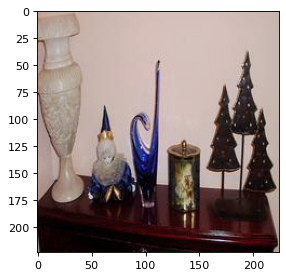

ground truth qst: what color is the middle vase ? ans: blue
generated qst: what is the man holding ? ans: phone


In [20]:
plt.rcParams['figure.dpi'] = 80
qst_vocab = train_dataset.qst_vocab
ans_vocab = train_dataset.ans_vocab
unk_idx = ans_vocab.unk2idx

qst_encoder = model.qst_encoder
qst_encoder.deterministic = True
qst_encoder.temperature = 0.1
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')

def evaluate_qst(model, data_loader, N=24):
    print( 'Evaluating question answer pairs' )
    num_eval = 0
    for batch_idx, batch_sample in enumerate(data_loader):
        if num_eval >= N:
            break
        # print(f'batch_idx: {batch_idx}')
        image = batch_sample['image'].to(DEVICE)
        question = batch_sample['question']
        answer = batch_sample['answer_label']
        image_path = batch_sample['image_path']
        
        # ground truth question and answers
        qst = [ qst_vocab.arr2qst( q ) for q in question ]
        ans = [ ans_vocab.idx2word( a ) for a in answer ]
        
        # generated question-answer
        gen_question, gen_answer = model.generate( image )
        gen_answer[:, unk_idx] = -9999.
        gen_answer = torch.argmax( gen_answer, 1 )
        gen_qst = [ qst_vocab.arr2qst( q ) for q in gen_question ]
        gen_ans = [ ans_vocab.idx2word( a ) for a in gen_answer ]
        
        n = len( image )
        for i in range( n ):
            mod_path = image_path[i].replace( 's64', 's' )
            print( f'\n\nimage path:{mod_path}' )
            img = mpimg.imread(mod_path)
            imgplot = plt.imshow(img)
            plt.show()
            print( f'ground truth qst: {qst[i]} ans: {ans[i]}' )
            print( f'generated qst: {gen_qst[i]} ans: {gen_ans[i]}' )
        num_eval += n
    
evaluate_qst(model, train_loader)

### Evaluate Model - Questions ( Stochastic Sampling )

qst_encoder deterministic: False temperature: 0.6
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393656.jpg


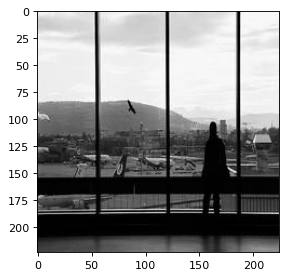

ground truth qst: what companies plane is in the window ? ans: sky
generated qst: is that a butterfly the woman ' s object in the background ? ans: drink


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525501.jpg


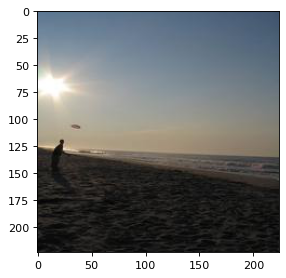

ground truth qst: is this picture taken from the ground ? ans: yes
generated qst: is this a sunny day ? ans: donut


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001084.jpg


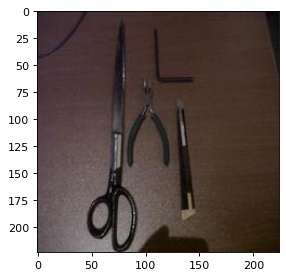

ground truth qst: what is the middle thing used for ? ans: cutting
generated qst: what are the scissors meant for a long day ? ans: milk


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000542.jpg


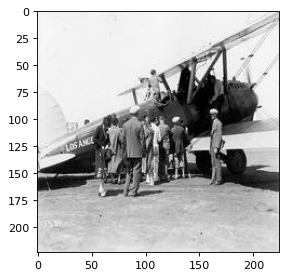

ground truth qst: what text is on the tail of the plane ? ans: <unk>
generated qst: what kind of transportation is this ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000371486.jpg


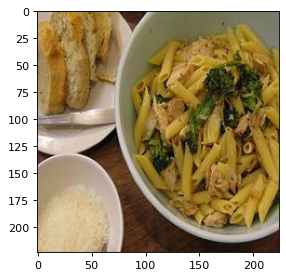

ground truth qst: what kind of pasta is used in the dish ? ans: <unk>
generated qst: is the food on the left side of the photo was taking place ? ans: decoration


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000436975.jpg


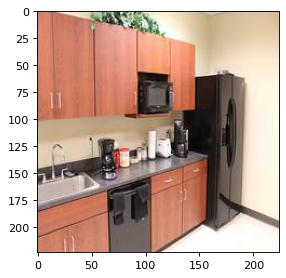

ground truth qst: is this a fancy kitchen ? ans: no
generated qst: what is the floor of the refrigerator made of ? ans: rectangular


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000437102.jpg


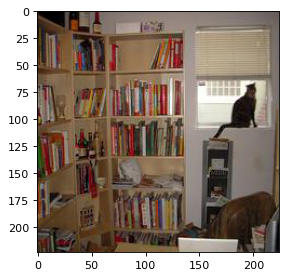

ground truth qst: is the cat full grown ? ans: yes
generated qst: is there a cat in the picture ? ans: cooking


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393224.jpg


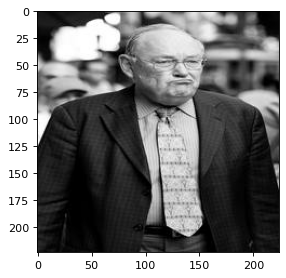

ground truth qst: what is the business man doing in the picture ? ans: walking
generated qst: does the man ' s tie have a pattern ? ans: hands


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525501.jpg


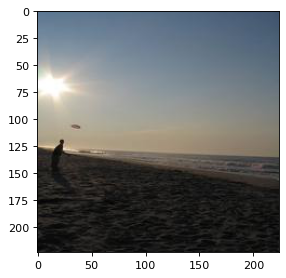

ground truth qst: is the sky cloudy ? ans: no
generated qst: is it a sunny day ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000445218.jpg


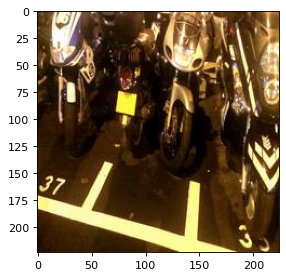

ground truth qst: what color is the second motorcycle ' s license plate ? ans: yellow
generated qst: what is the brand of the vehicle ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525501.jpg


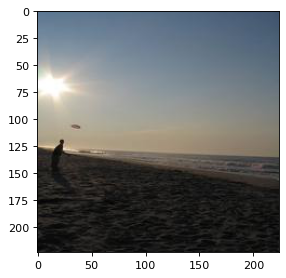

ground truth qst: is the sun close to the ground ? ans: yes
generated qst: is there a boat in the foreground ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263333.jpg


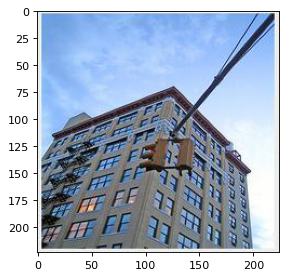

ground truth qst: are their balconies on this building ? ans: yes
generated qst: is it day time ? ans: couch


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000305527.jpg


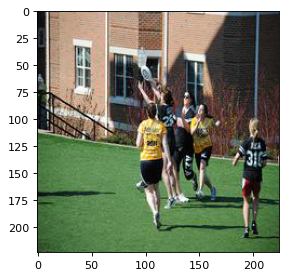

ground truth qst: which game are they playing ? ans: frisbee
generated qst: what are the kids playing with the ball holding a handle ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000043773.jpg


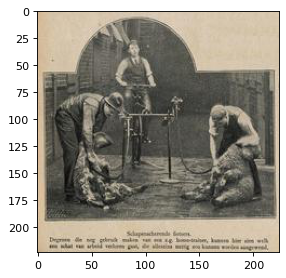

ground truth qst: what is powering the contraption in this photograph ? ans: bicycle
generated qst: is the man standing in front of a man ? ans: 2012


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262492.jpg


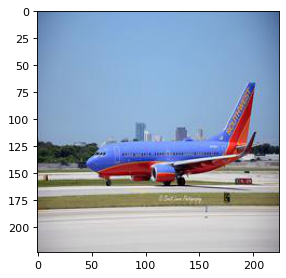

ground truth qst: what airline is this plane flying ? ans: <unk>
generated qst: how many stars in the sky ? ans: rectangular


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394269.jpg


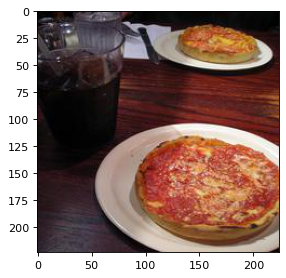

ground truth qst: what is the pizza sitting on ? ans: plate
generated qst: what kind of wine ? ans: pug


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262187.jpg


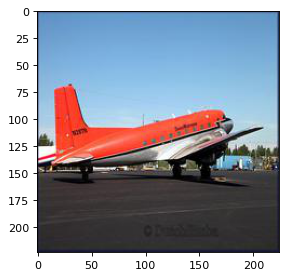

ground truth qst: what color is the plane ? ans: red
generated qst: what color is the plane ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131174.jpg


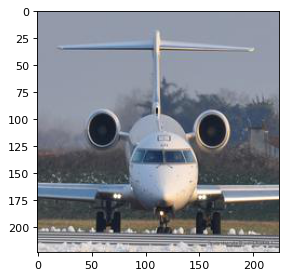

ground truth qst: is there anyone in the cockpit ? ans: yes
generated qst: how many people are in the plane ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393291.jpg


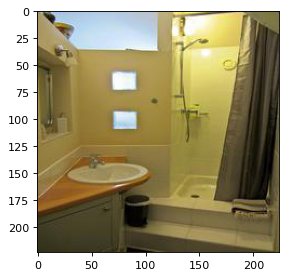

ground truth qst: what are the colors of the countertop ? ans: brown
generated qst: is there any living things in this room ? ans: ball


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393950.jpg


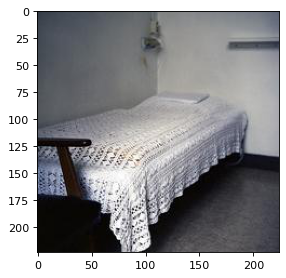

ground truth qst: is the floor tiled or carpeted ? ans: carpet
generated qst: how many beds are there ? ans: indian


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131703.jpg


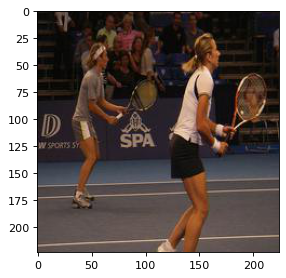

ground truth qst: what color is the woman skirt ? ans: black
generated qst: what are the two people holding in their right hand ? ans: urban


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262707.jpg


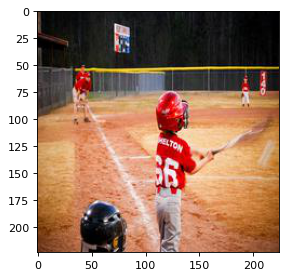

ground truth qst: what number is on the batter ? ans: <unk>
generated qst: what sport is this man playing ? ans: indian


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000546151.jpg


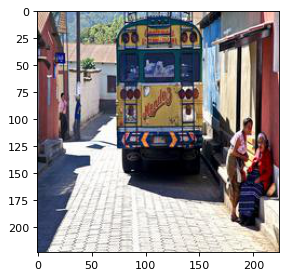

ground truth qst: is the bus stopped ? ans: yes
generated qst: what is the man on the left side of the photo flying the side of the screen ? ans: indian


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000458876.jpg


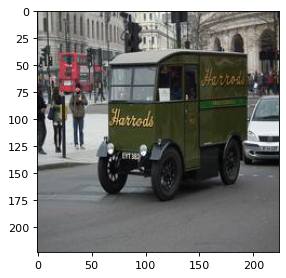

ground truth qst: what does the front of the truck say ? ans: <unk>
generated qst: how many people are in the photo ? ans: urban


In [15]:
qst_encoder = model.qst_encoder
qst_encoder.deterministic = False
qst_encoder.temperature = 0.6
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')
evaluate_qst(model, train_loader, N=24)